<a href="https://colab.research.google.com/github/krishnx27/mobiledata/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path ='/content/Sales.csv'
df = pd.read_csv(file_path)
print(df.head())

    Brands        Models         Colors Memory Storage Camera  Rating  \
0  SAMSUNG  GALAXY M31S    Mirage Black   8 GB  128 GB    Yes     4.3   
1    Nokia           3.2          Steel   2 GB   16 GB    Yes     3.8   
2   realme           C2   Diamond Black   2 GB     NaN    Yes     4.4   
3  Infinix        Note 5       Ice Blue   4 GB   64 GB    Yes     4.2   
4    Apple    iPhone 11           Black    4GB   64 GB    Yes     4.6   

   Selling Price  Original Price                Mobile  Discount  \
0          19330           20999  SAMSUNG GALAXY M31S       1669   
1          10199           10199             Nokia 3.2         0   
2           6999            7999            realme C2       1000   
3          12999           12999        Infinix Note 5         0   
4          49900           49900      Apple iPhone 11          0   

   discount percentage  
0             7.947998  
1             0.000000  
2            12.501563  
3             0.000000  
4             0.000000  


In [ ]:
# Create a DataFrame
df = pd.DataFrame(df)

In [ ]:
# Calculate Discount and Discount Percentage
df['Discount'] = df['Original Price'] - df['Selling Price']
df['Discount Percentage'] = (df['Discount'] / df['Original Price']) * 100

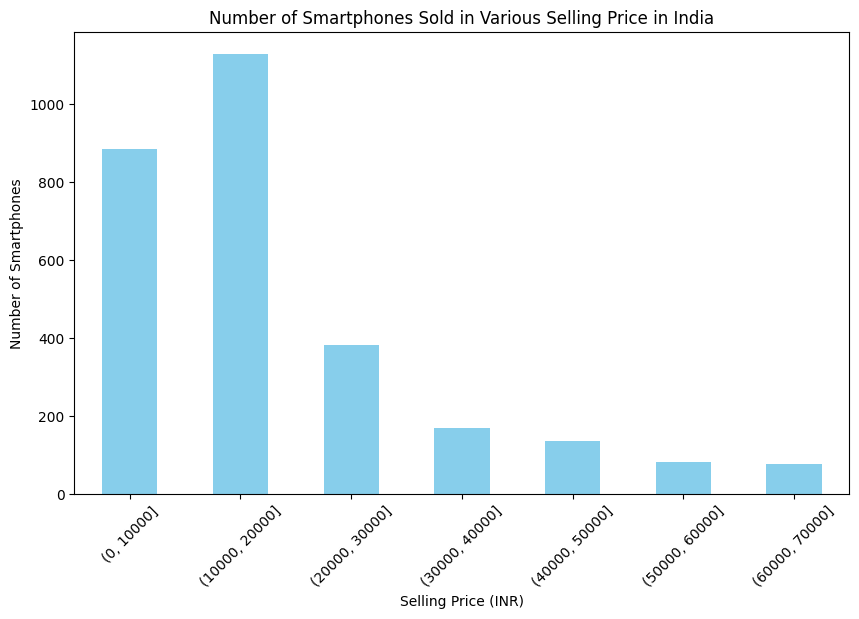

The price range with the most smartphones is (10000, 20000] with 1129 smartphones.
Filtered products in the most sold price range:
        Brands           Models   Selling Price
0      SAMSUNG     GALAXY M31S   (10000, 20000]
1        Nokia              3.2  (10000, 20000]
3      Infinix           Note 5  (10000, 20000]
10     SAMSUNG      Galaxy A12   (10000, 20000]
12      realme           X7 5G   (10000, 20000]
...        ...              ...             ...
3089      ASUS  ZenFone Max M2   (10000, 20000]
3091  Motorola      One Vision   (10000, 20000]
3098    realme                2  (10000, 20000]
3104        LG        Q Stylus   (10000, 20000]
3109      POCO        M4 Pro 5G  (10000, 20000]

[1129 rows x 3 columns]


In [ ]:
import numpy as np
# Create a DataFrame
smartphones_df = pd.DataFrame(df)

# 1. Analyze the price distribution
# Create bins for price ranges
bins = np.arange(0, 80000, 10000)  # Adjust bins as needed
smartphones_df['Selling Price'] = pd.cut(smartphones_df['Selling Price'], bins=bins)

# Count the number of smartphones in each price range
price_range_counts = smartphones_df['Selling Price'].value_counts().sort_index()

# 2. Plot the price distribution
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Smartphones Sold in Various Selling Price in India')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Number of Smartphones')
plt.xticks(rotation=45)
plt.show()

# 3. Identify the price range with the most smartphones
most_common_price_range = price_range_counts.idxmax()
most_common_count = price_range_counts.max()

print(f"The price range with the most smartphones is {most_common_price_range} with {most_common_count} smartphones.")

# 4. Filter products in the identified price range
filtered_products = smartphones_df[smartphones_df['Selling Price'] == most_common_price_range]

# Display the filtered products
print("Filtered products in the most sold price range:")
print(filtered_products[['Brands', 'Models', 'Selling Price']])

In [ ]:
# Analyze the most common price range
most_common_range = df['Selling Price'].mode()[0]
print(f'The most common price range for smartphones sold is: {most_common_range}')

# Filter products within the most common price range
filtered_products = df[df['Selling Price'] == most_common_range]

# Display filtered products
print(filtered_products[['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Selling Price', 'Original Price', 'Discount', 'Discount Percentage']])

The most common price range for smartphones sold is: 9999
        Brands        Models           Colors Memory Storage  Selling Price  \
20    Motorola             M             Grey   4 GB   64 GB           9999   
176    Infinix         Hot 8       Shark Grey   4 GB   64 GB           9999   
191     Lenovo           K9             Black   3 GB   32 GB           9999   
302     realme          C25       Watery Grey   4 GB   64 GB           9999   
359    Infinix        Hot S3       Blush Gold   3 GB   32 GB           9999   
...        ...           ...              ...    ...     ...            ...   
2860   Infinix  Smart 4 Plus           Violet   3 GB   32 GB           9999   
2914   Infinix         Hot 7      Mocha Brown   4 GB   64 GB           9999   
2990    realme         C21Y       Cross Black   4 GB   64 GB           9999   
2991   Infinix        Hot S3    Bordeaux Red    3 GB   32 GB           9999   
3051   Infinix            S4  Twilight Purple   3 GB   32 GB           99

In [ ]:
# Visualizing the best-rated brand
best_rated_brand = df.groupby('Brands')['Rating'].mean().idxmax()
print(f"Best Rated Brands: {best_rated_brand}")

Best Rated Brands: Apple


<ipython-input-8-6d06b8a58910>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Brands', y='Rating', ci=None)


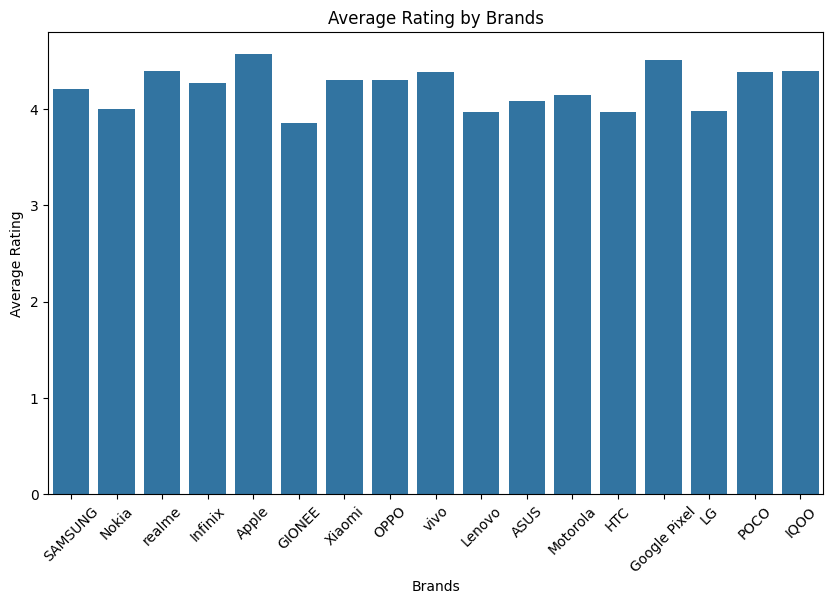

In [ ]:
# Plot average ratings by brand
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Brands', y='Rating', ci=None)
plt.title('Average Rating by Brands')
plt.ylabel('Average Rating')
plt.xlabel('Brands')
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-30cfcc16b37e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_selling_price, x='Brands', y='Selling Price', ci=None)


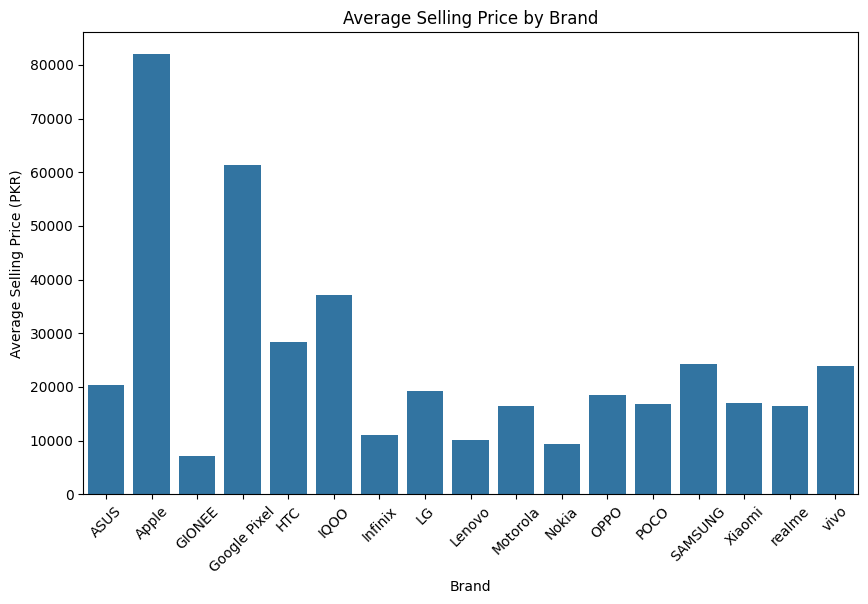

In [ ]:
# Plot brands with average selling price
avg_selling_price = df.groupby('Brands')['Selling Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_selling_price, x='Brands', y='Selling Price', ci=None)
plt.title('Average Selling Price by Brand')
plt.ylabel('Average Selling Price (PKR)')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show() ki

<ipython-input-10-faab95a049a7>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_discount, x='Brands', y='discount percentage', ci=None)


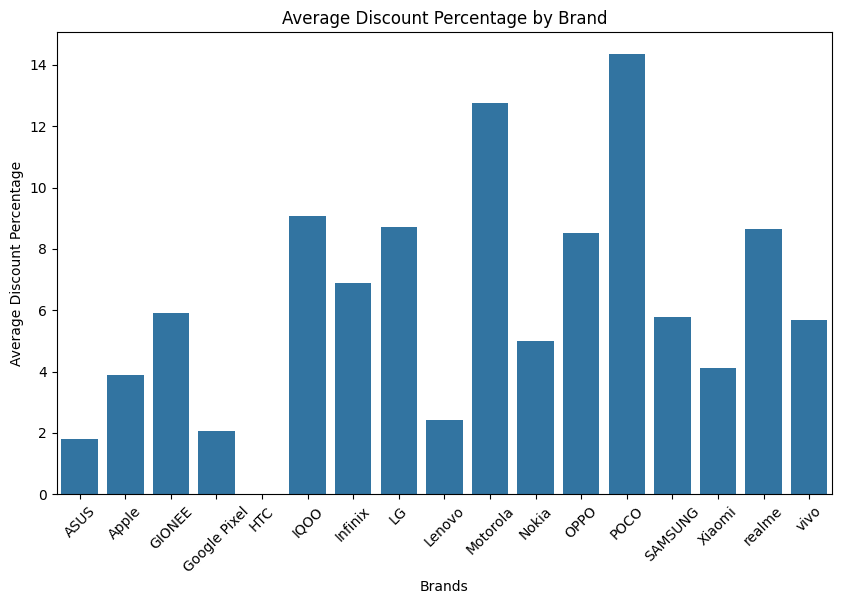

In [ ]:
# Plot brands with average discount percentage
avg_discount = df.groupby('Brands')['discount percentage'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_discount, x='Brands', y='discount percentage', ci=None)
plt.title('Average Discount Percentage by Brand')
plt.ylabel('Average Discount Percentage')
plt.xlabel('Brands')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Finding models with high ratings
top_models = df[df['Rating'] == df['Rating'].max()]
print("Top Rated Models:\n", top_models[['Brands', 'Models', 'Rating']])

Top Rated Models:
        Brands          Models  Rating
247      vivo           X50       5.0
1446     vivo             Z1x     5.0
1655     vivo         X60 Pro     5.0
2242  SAMSUNG  SM-B310EZDDINS     5.0
2483    Apple  iPhone 7 Plus      5.0
2634    Apple  iPhone 7 Plus      5.0
2879     vivo              S2     5.0


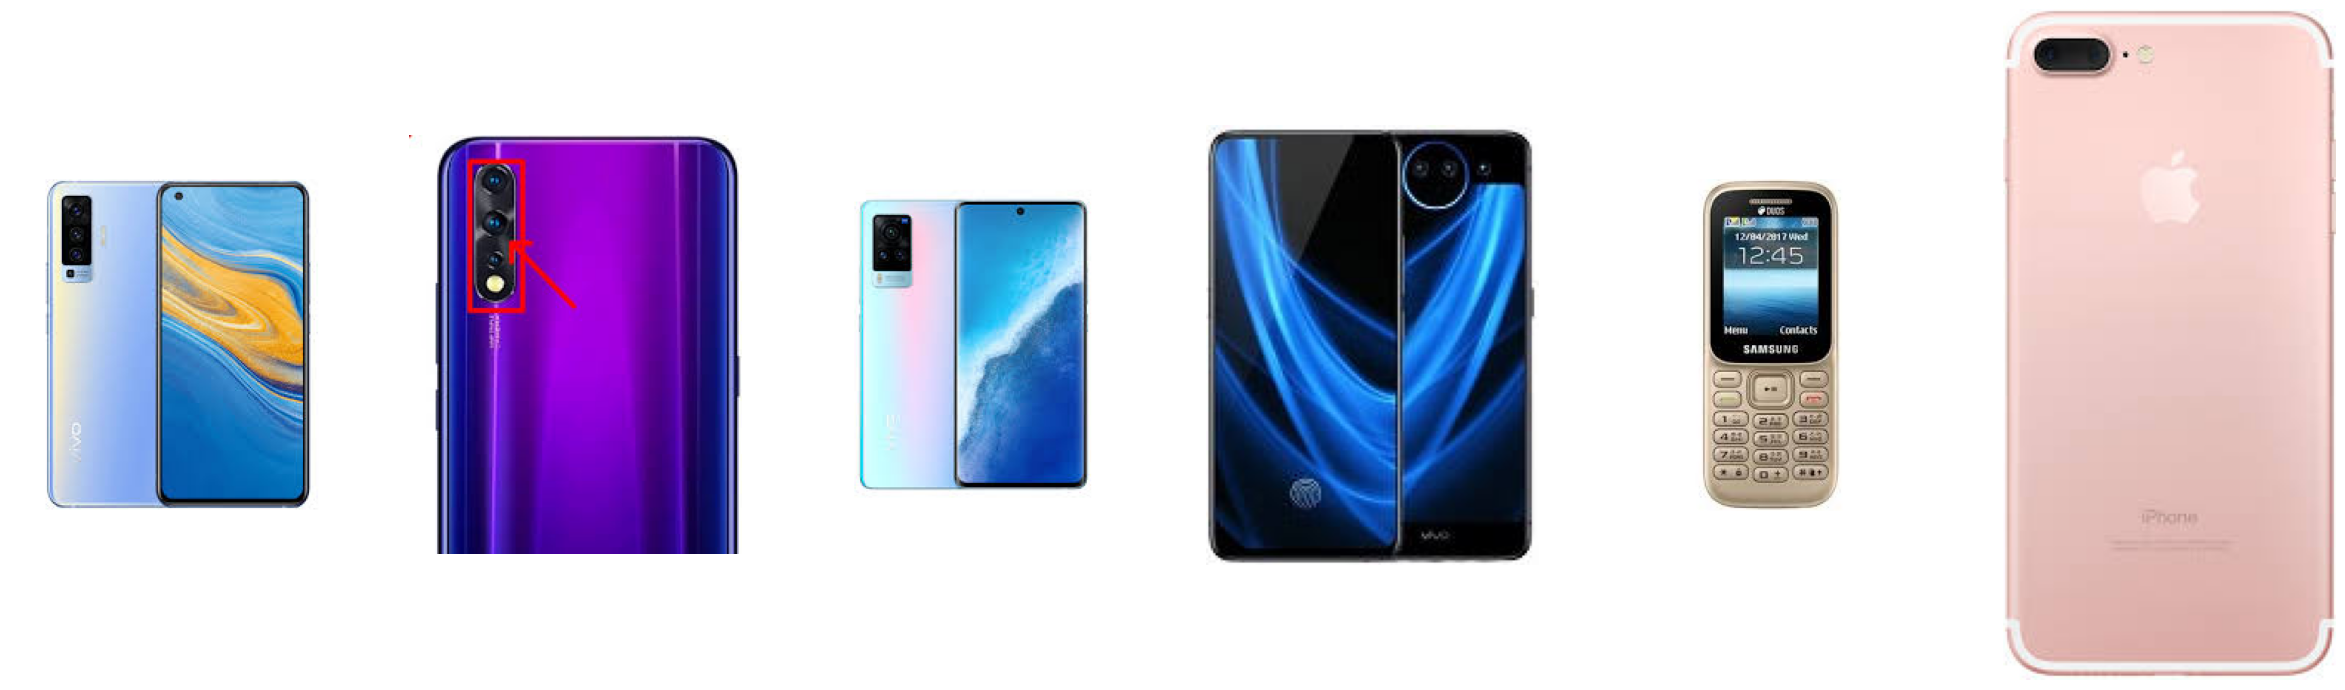

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# create a images path list
image_paths = ['phone1.jpeg', 'phone2.jpeg', 'photo3.jpeg','phone4.jpeg','phone5.jpeg','phone6.jpeg']

# for subpart figure create a axes
fig, axes = plt.subplots(1, len(image_paths), figsize=(30, 10))

# loop for displaying every images in loop
for ax, img_path in zip(axes, image_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

# Show the pictures
plt.show()
